Se importan las librerías necesarias para la tarea

In [6]:

import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np
from astropy.visualization import make_lupton_rgb
from photutils.segmentation import detect_sources,detect_threshold,deblend_sources,SourceCatalog
from photutils.isophote import EllipseGeometry,Ellipse
from photutils.aperture import EllipticalAperture
from photutils.datasets import make_100gaussians_image

#Se abre la imagen descargada en formato fits para que nos dé la información
imagen = fits.open('cutout_197.2260_28.1846.fits')
imagen.info()

Filename: cutout_197.2260_28.1846.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   (1024, 1024, 3)   float32   


In [7]:
data_image = imagen[0].data
print(type(data_image))
print(data_image.shape)



<class 'numpy.ndarray'>
(3, 1024, 1024)


Se separan los filtros de la imagen

In [8]:

g_layer=data_image[0]
r_layer=data_image[1]
z_layer=data_image[2]


Podemos visualizar la imagen con cada 'layer'

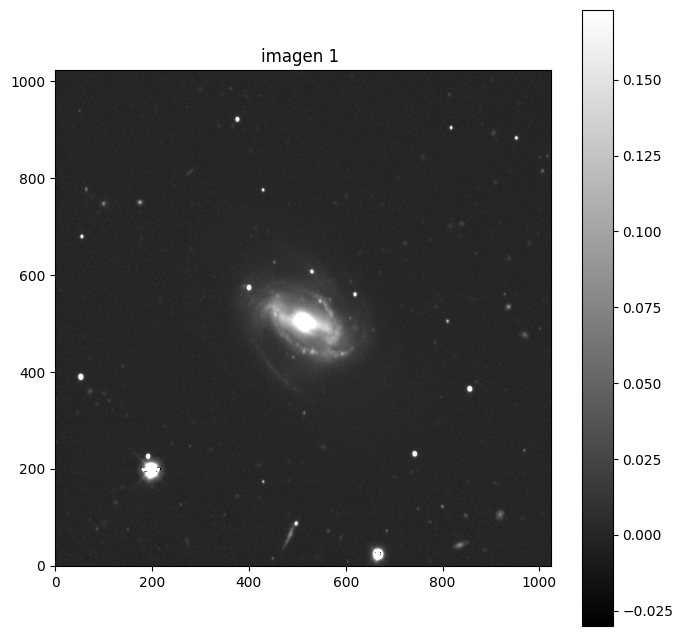

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(g_layer,vmax=np.mean(g_layer)+np.std(g_layer),origin='lower', vmin=-0.03, cmap = 'gray')
plt.colorbar()
plt.title('imagen 1 ')
plt.show()

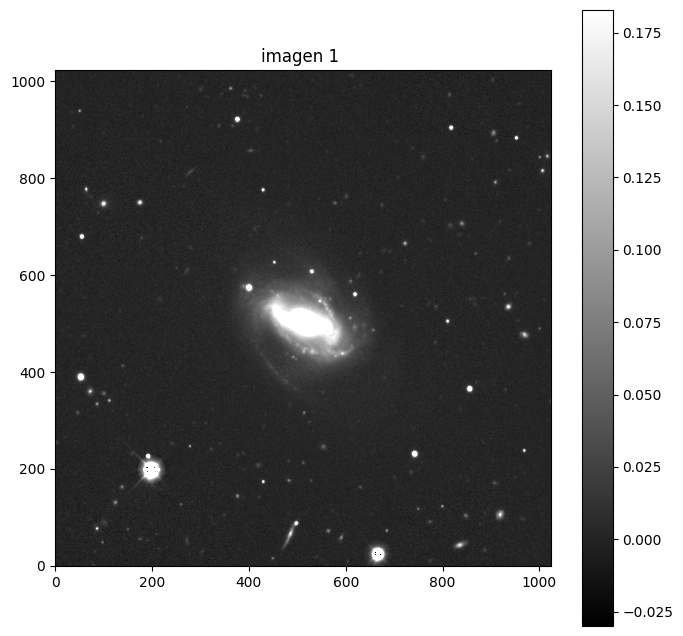

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(r_layer,vmax=np.mean(r_layer)+np.std(r_layer),origin='lower', vmin=-0.03, cmap='gray')
plt.colorbar()
plt.title('imagen 1 ')
plt.show()

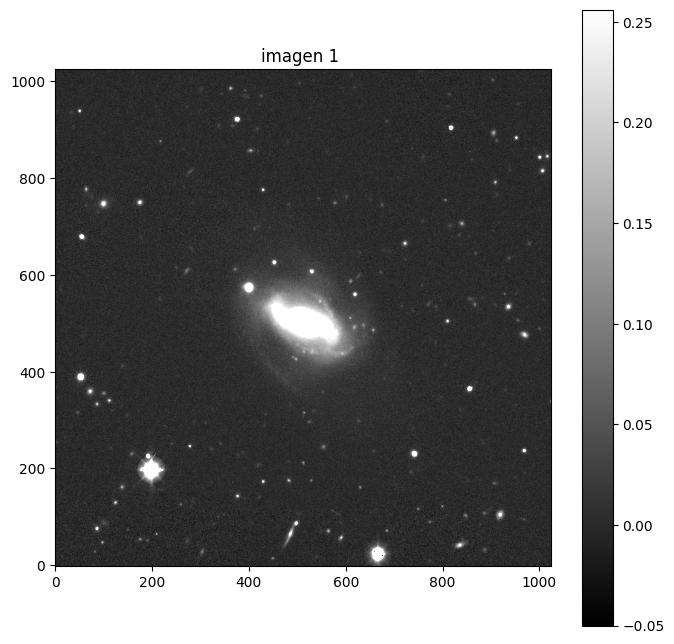

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(z_layer,vmax=np.mean(z_layer)+np.std(z_layer),origin='lower', vmin=-0.05, cmap='gray')
plt.colorbar()
plt.title('imagen 1 ')
plt.show()

Acá podemos definir una función con la cual se genere el mapa para las fuentes. Luego vemos la cantidad de estas para el mapa con la manera simple y 'deblended'. 

In [12]:
#se define una función con la cual se genera el mapa para las fuentes.
def segm_map(dat, ns, np, c, np2):
    mapa1=detect_sources(dat, detect_threshold(dat,nsigma=ns), npixels=np)
    mapa2= deblend_sources(dat, mapa1, contrast=c,npixels=np2, progress_bar=False)
    return mapa1,mapa2


In [13]:
mapa_g,segment_g=segm_map(g_layer,3,5,0.1,5)
mapa_g.nlabels,segment_g.nlabels

(211, 224)

In [14]:
mapa_r, segment_r=segm_map(r_layer,3,5,0.1,5)
mapa_r.nlabels, segment_r.nlabels

(251, 267)

In [15]:
mapa_z,segment_z=segm_map(z_layer,3,5,0.1,5)
mapa_z.nlabels,segment_z.nlabels

(232, 239)

Luego podemos visualizar con cada filtro, la imagen segmentada con estas funciones. 

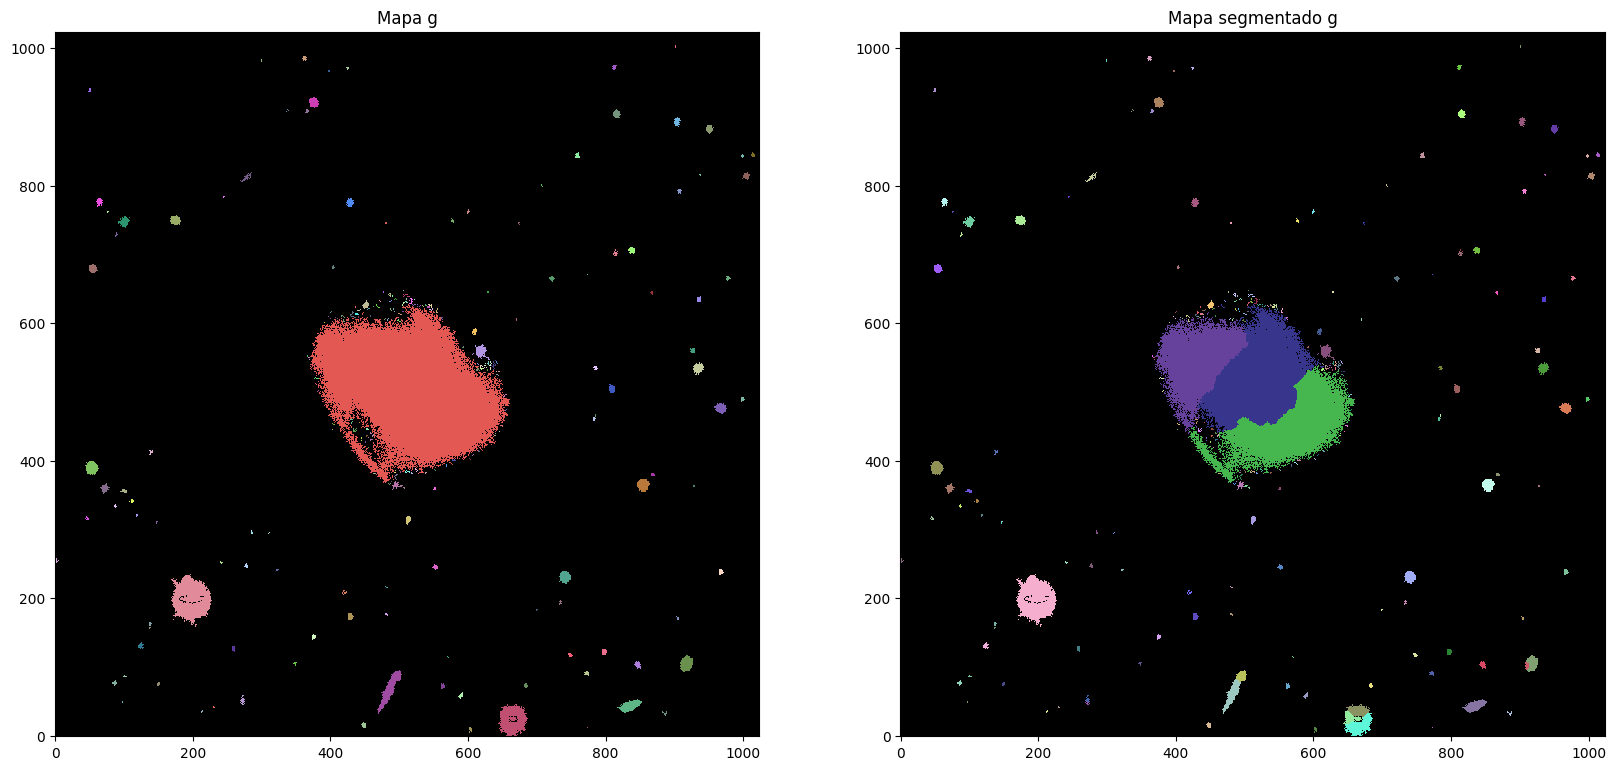

In [16]:
cmapa1=mapa_g.make_cmap(seed=1)
cmapa2=segment_g.make_cmap(seed=2) 
fig,axs=plt.subplots(1,2,figsize=(20,20))
axs[0].imshow(mapa_g,cmap=cmapa1, origin="lower", interpolation='nearest')
axs[0].set_title('Mapa g')

axs[1].imshow(segment_g,cmap=cmapa2, origin="lower", interpolation='nearest')
axs[1].set_title('Mapa segmentado g')

plt.show()

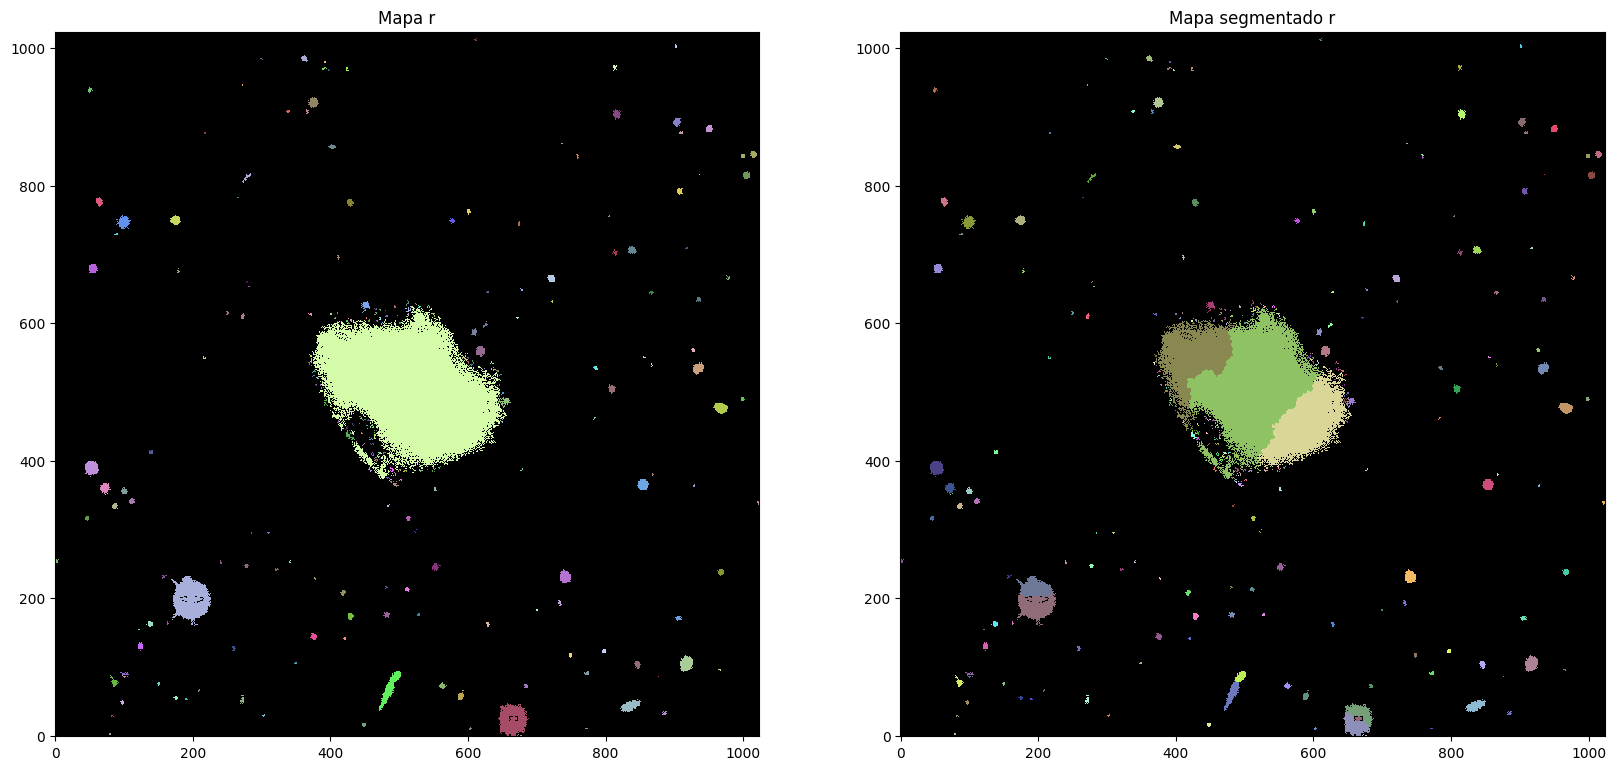

In [17]:
cmapa1=mapa_r.make_cmap(seed=1)
cmapa2=segment_r.make_cmap(seed=2) 
fig,axs=plt.subplots(1,2,figsize=(20,20))
axs[0].imshow(mapa_r,cmap=cmapa1, origin="lower", interpolation='nearest')
axs[0].set_title('Mapa r')

axs[1].imshow(segment_r,cmap=cmapa2, origin="lower", interpolation='nearest')
axs[1].set_title('Mapa segmentado r')

plt.show()

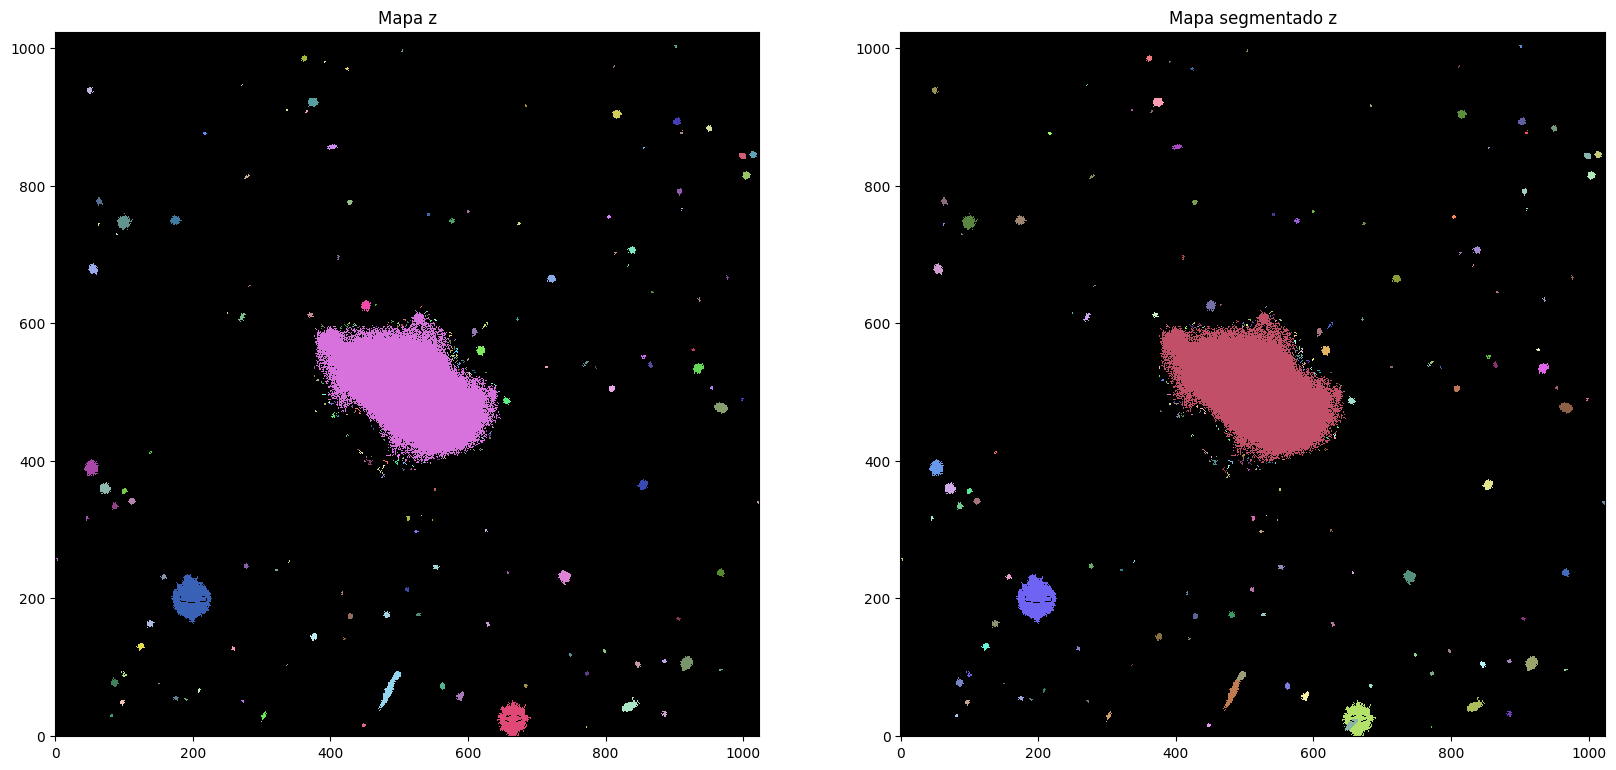

In [18]:
cmapa1=mapa_z.make_cmap(seed=1)
cmapa2=segment_z.make_cmap(seed=2) 
fig,axs=plt.subplots(1,2,figsize=(20,20))
axs[0].imshow(mapa_z,cmap=cmapa1, origin="lower", interpolation='nearest')
axs[0].set_title('Mapa z')

axs[1].imshow(segment_z,cmap=cmapa2, origin="lower", interpolation='nearest')
axs[1].set_title('Mapa segmentado z')

plt.show()

Ahora se generará el catálogo simple de cada filtro, g, r y z, respectivamente.

In [19]:

catal_g=SourceCatalog(g_layer,segment_g)
tab_g=catal_g.to_table()
tab_g

<QTable length=224>
label     xcentroid          ycentroid      ...      kron_flux      kron_fluxerr
                                            ...                                 
int64      float64            float64       ...       float64         float64   
----- ------------------ ------------------ ... ------------------- ------------
    1  602.9614686184772  8.886200903301287 ...  0.7268762866810073          nan
    2  772.1796101860399 10.715170441132928 ...  0.2439898753169933          nan
    3  448.3141301486317 15.199258491246432 ...  1.4084667049399529          nan
    4   885.510733537265  32.68581234086476 ...  1.0776391146839734          nan
    5   834.379390414992   42.9462931422607 ...  13.821970625799326          nan
    6  213.0668835101722  35.50182588161812 ...  0.2554929954330076          nan
    7 230.37073574123102  40.77797303249943 ... 0.20906803356507747          nan
    8  97.58115424453051 48.982515028421496 ...  0.2920732478137867          nan
    9  589.1733954461646  58.15621600484288 ...    1.61852800226265          nan
  ...                ...                ... ...                 ...          ...
  215  460.9924492318013 435.84674341277156 ...  1.5390342578105036          nan
  216  623.7780983122356   534.503610663536 ...    2.72146566740666          nan
  217  619.0912278316522  537.1997564900785 ...   3.391654814028521          nan
  218  418.9403628355894    604.47563969711 ...  3.1674522318521747          nan
  219  416.7555064319569  609.5063972694078 ...  1.4483345166673898          nan
  220  433.9514710077293  607.9299528059287 ...  0.8345030567424168          nan
  221 429.87397049295225  610.2701190628824 ...  3.8856960232092286          nan
  222 432.23584530594525  614.7284524810395 ...   1.664785776019392          nan
  223  813.5610174329227  700.1768937245696 ...  1.8213432718440552          nan
  224  815.1103033568045  704.7324114535304 ...  0.9359809573340843          nan

In [20]:
 
catal_r=SourceCatalog(r_layer,segment_r)
tab_r=catal_r.to_table()
tab_r

<QTable length=267>
label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
int64      float64            float64       ...      float64         float64   
----- ------------------ ------------------ ... ------------------ ------------
    1  671.9852079258504 0.9635064041612115 ... 0.8569660851197763          nan
    2  675.5976406594835 1.1941008583811648 ... 0.5968200012740581          nan
    3  79.28504688885026  2.171210860266818 ... 0.4592371463696866          nan
    4   603.139849429628  9.893661890628612 ...   0.72974490212884          nan
    5  771.9684804621805 10.434976828396167 ... 1.1914466856137682          nan
    6 448.36347893991535 15.657607962388733 ...  2.221803386104817          nan
    7  302.5918853630071  28.86941448100363 ...  1.505619526462839          nan
    8  82.08394784970362 28.997627023206086 ... 0.4340251567307691          nan
    9  884.8591601001365  32.54643890550206 ... 1.9384682506329245          nan
  ...                ...                ... ...                ...          ...
  258  646.1163854368708  486.4998447010798 ...  5.945394749559962          nan
  259  391.5502717514365 483.42041180754404 ... 11.022662055078152          nan
  260  393.1421281911942 487.91508621428375 ...  3.580675138701653          nan
  261  596.7371455652305  546.5029318214691 ... 3.5506794258724215          nan
  262  593.3369096548848  549.7874940932938 ...  7.742084717274894          nan
  263  513.2850029434003   618.243311022015 ... 14.677111582943137          nan
  264 510.02790705540326  619.7982861844253 ... 2.1994781455572623          nan
  265  516.5610376791863  622.6510691282027 ...  1.621270762061412          nan
  266  758.5837070485236  839.5407614215519 ... 1.6647883826665237          nan
  267  758.6619938485036  843.0021849055895 ... 1.6892899778238863          nan

In [21]:
 
catal_z=SourceCatalog(z_layer,segment_z)
tab_z=catal_z.to_table()
tab_z

<QTable length=239>
label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
int64      float64            float64       ...      float64         float64   
----- ------------------ ------------------ ... ------------------ ------------
    1  771.4029100189058 11.757864882800444 ... 1.0584557361704374          nan
    2 448.19779549774717   15.3966648069528 ...   2.89617787438062          nan
    3  302.7002159011151  28.91593409710172 ...  8.271550075465973          nan
    4  81.58407802720919 29.203841276405107 ...  1.501381679789444          nan
    5  884.6589133785697 32.645077248780986 ...  4.800920155757712          nan
    6  834.2076727168977  43.11103693473294 ... 36.011785444911496          nan
    7  97.28196624796637   48.1702115359292 ...  4.135117962286811          nan
    8  271.8704025898037 49.850697295741035 ... 2.8163176432626793          nan
    9 175.04719919514145  54.54191078480815 ...  5.073591507682514          nan
  ...                ...                ... ...                ...          ...
  230 496.16813543115023  87.31329239351881 ... 27.357077272678715          nan
  231 494.98988680375237 403.53711703419015 ...  4.533419093479108          nan
  232 498.85082618256547 403.64681423263374 ...  9.259883917819588          nan
  233 498.77301511817797    407.39581555759 ...  4.105119798529609          nan
  234 401.32826123954385  481.7445409896767 ... 11.553415150756187          nan
  235 405.72737894303975  484.6012882583453 ...  6.845942975966368          nan
  236  768.1615524980663  538.5434659030844 ...  3.498670038103201          nan
  237   771.540717792184  541.9610655816637 ...  3.142445793573267          nan
  238   576.609369772269  549.5865564738316 ...  18.68929064058594          nan
  239  582.1760743226405  552.5722656448513 ...  10.82496725570885          nan

Para poder observar la imagen a color, primero se debe generar con la función make_lupton_rgb.

In [22]:

imrgb = make_lupton_rgb(g_layer, r_layer, z_layer, minimum=0, stretch=0.2, Q=8)

Luego se grafica junto con las fuentes detectadas:

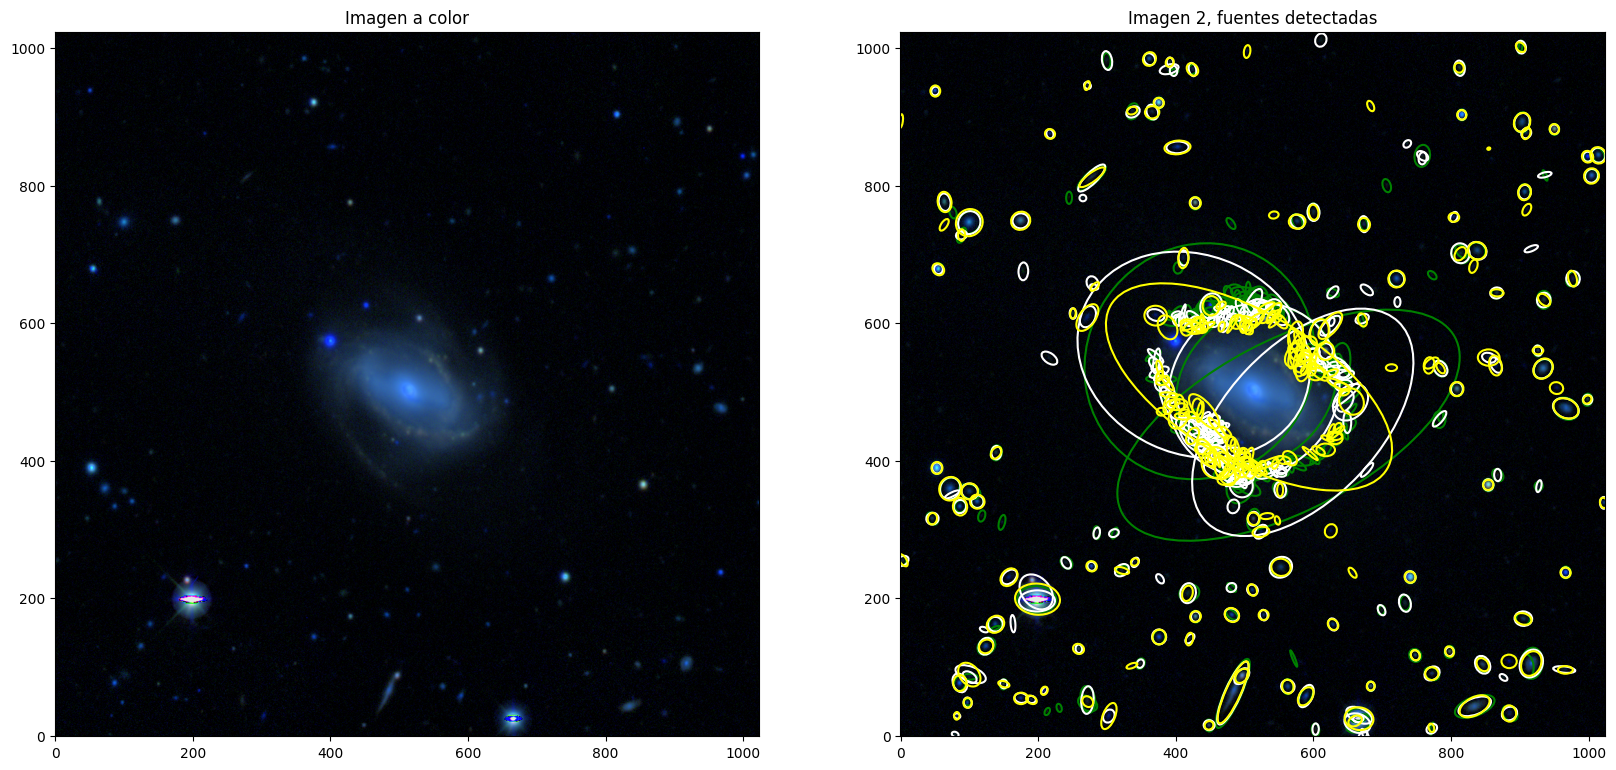

In [23]:
 
fig,axs=plt.subplots(1,2,figsize=(20,20))
axs[0].imshow(imrgb, origin='lower',\
           vmin=0, vmax=np.mean(imrgb)+np.std(imrgb))
axs[0].set_title('Imagen a color')

axs[1].imshow(imrgb, origin='lower',\
           vmin=0, vmax=np.mean(imrgb)+np.std(imrgb))
axs[1].set_title('Imagen 2, fuentes detectadas')
catal_g.plot_kron_apertures(color='green', lw=1.5)
catal_r.plot_kron_apertures(color='white', lw=1.5)
catal_z.plot_kron_apertures(color='yellow', lw=1.5)
plt.show()

Se puede observar una cantidad mucho mayor de objetos de lo que se podría imaginar a simple vista, y la gran mayoría de estos objetos se observan con el z_layer, por lo tanto es más hacia el infrarrojo que se pueden observar los objetos marcados con amarillo.

**ISOFOTAS**

Se nombrará cada objeto de los 9 seleccionados, como obi, con i de 1 a 9.

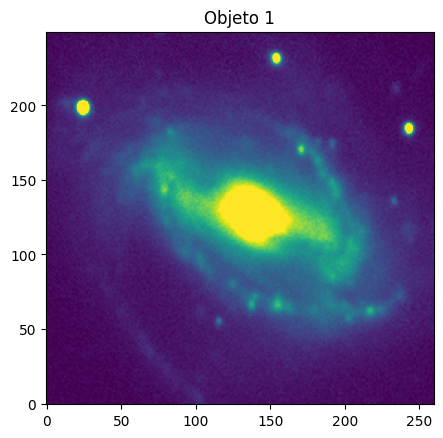

In [27]:

ob1 = g_layer[375:625, 375:635]
plt.figure(figsize=(5,5))
plt.imshow(ob1, origin='lower',\
           vmin=0, vmax=np.mean(g_layer)+np.std(g_layer))
plt.title('Objeto 1')
plt.show()

La función EllipseGeometry cuenta con los elementos x0,y0 que son las coordenadas del centro de la elipse en la figuraa, sma corresponde a la medida del semieje mayor, pa corresponde al ángulo de rotación respecto a x, y eps es la elipticidad de la figura. Se irá modificando estos valores de acuerdo a la necesidad de cada objeto seleccionado.

In [29]:
geometry = EllipseGeometry(x0=140, y0=125, sma=30, eps=0.5,pa=40.0 * np.pi / 180.0)
apert = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,\
                           geometry.sma * (1 - geometry.eps),geometry.pa)

def isofogen(obj,geo_obj): #Función para generar una lista de isofotas 
    return Ellipse(obj,geo_obj).fit_image()

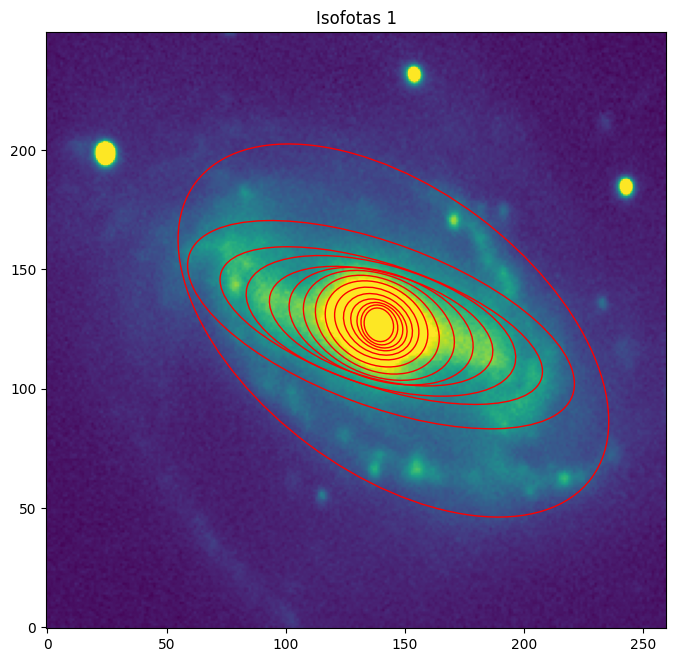

In [31]:
def aper(f,x): #Función para graficar isofotas
    return EllipticalAperture((f.x0[x], f.y0[x]), f.sma[x],\
                          f.sma[x] * (1 - f.eps[x]),f.pa[x])

isofo1=isofogen(ob1,geometry)

plt.figure(figsize=(8,8))
plt.imshow(ob1, origin='lower',vmax=np.mean(g_layer)+np.std(g_layer))
plt.title('Isofotas 1')
for i in range (28,58,2):
    aper(isofo1,i).plot(color='red')

**Objeto 2**

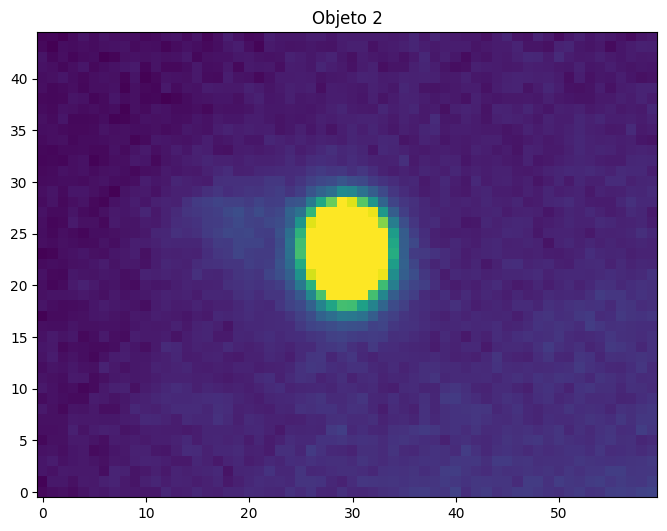

In [32]:


ob2 = g_layer[550:595, 370:430]
plt.figure(figsize=(8,8))
plt.imshow(ob2, origin='lower',\
           vmin=0, vmax=np.mean(g_layer)+np.std(g_layer))
plt.title('Objeto 2')
plt.show()


(<matplotlib.patches.Ellipse at 0x7f084d98f940>,)

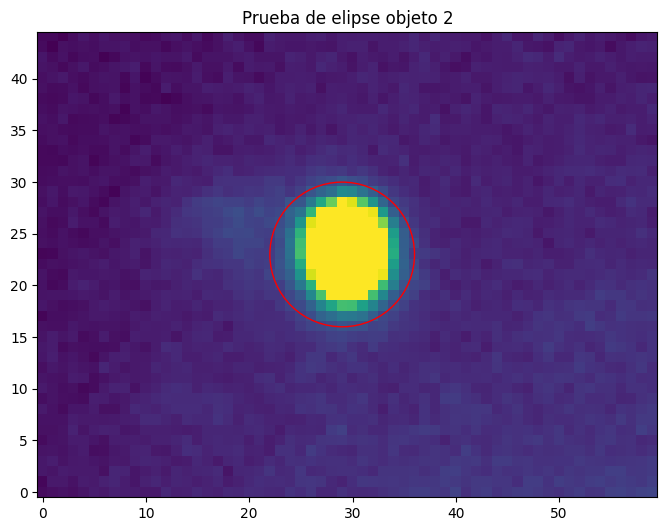

In [33]:

geometry = EllipseGeometry(x0=29, y0=23, sma=7, eps=0.0,pa=1 * np.pi / 180.0)
apert = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,\
                           geometry.sma * (1 - geometry.eps),geometry.pa)

plt.figure(figsize=(8,8))
plt.imshow(ob2, origin='lower',vmax=np.mean(g_layer)+np.std(g_layer))
plt.title('Prueba de elipse objeto 2')
apert.plot(color='red')

Se generan las isofotas del segundo objeto, hasta el noveno.

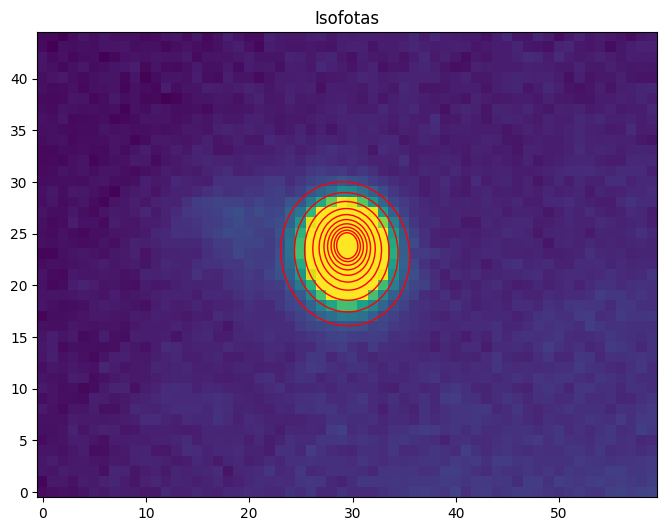

In [34]:

isofo2=isofogen(ob2,geometry)

plt.figure(figsize=(8,8))
plt.imshow(ob2, origin='lower',vmax=np.mean(g_layer)+np.std(g_layer))
plt.title('Isofotas')
for i in range (10,30,2):
    aper(isofo2,i).plot(color='red')

**Objeto 3**

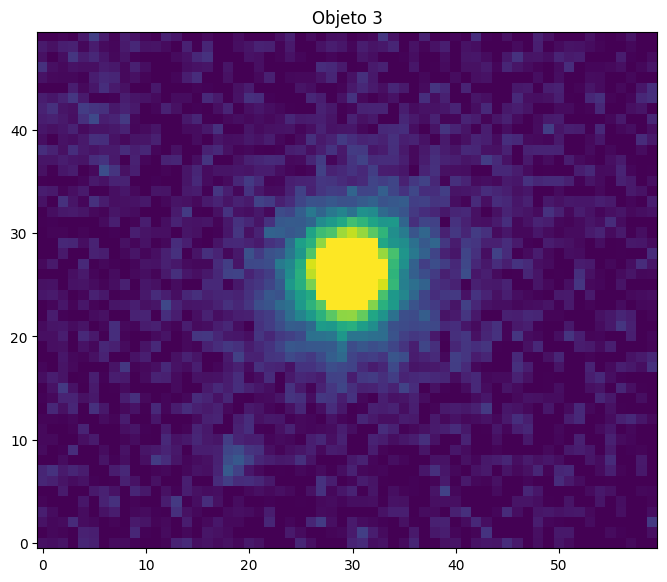

In [38]:


ob3 = z_layer[720:770, 70:130]
plt.figure(figsize=(8,8))
plt.imshow(ob3, origin='lower',\
           vmin=0, vmax=np.mean(z_layer)+np.std(z_layer))
plt.title('Objeto 3')
plt.show()

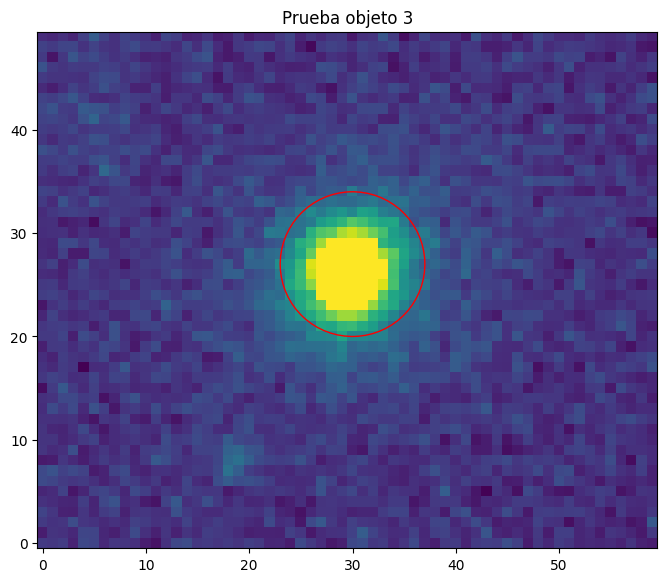

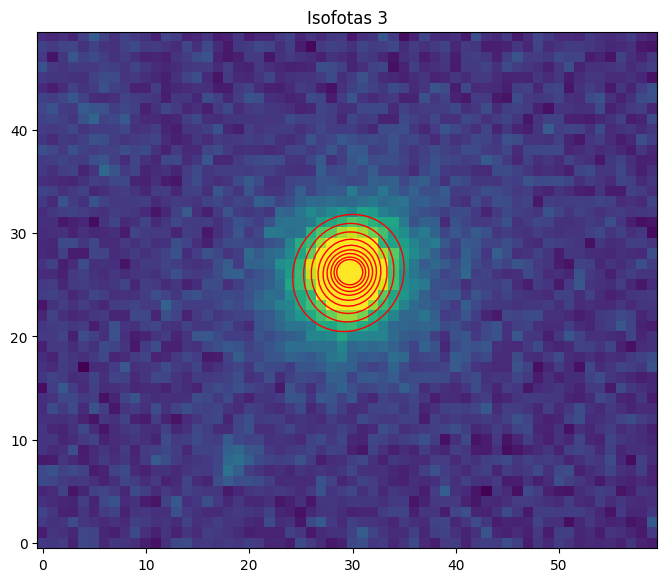

In [37]:
geometry = EllipseGeometry(x0=30, y0=27, sma=7, eps=0.0,pa=2 * np.pi / 180.0)
apert = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,\
                           geometry.sma * (1 - geometry.eps),geometry.pa)

plt.figure(figsize=(8,8))
plt.imshow(ob3, origin='lower',vmax=np.mean(z_layer)+np.std(z_layer))
plt.title('Prueba objeto 3')
apert.plot(color='red')

isofo3=isofogen(ob3,geometry)

plt.figure(figsize=(8,8))
plt.imshow(ob3, origin='lower',vmax=np.mean(z_layer)+np.std(z_layer))
plt.title('Isofotas 3')
for i in range (10,28,2):
    aper(isofo3,i).plot(color='red')

**Objeto 4**

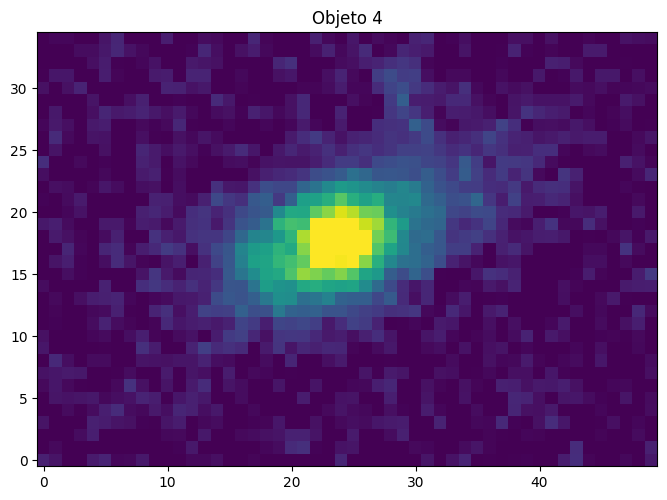

In [ ]:
#Objeto 4 

ob4 = z_layer[25:60, 810:860]
plt.figure(figsize=(8,8))
plt.imshow(ob4, origin='lower',\
           vmin=0, vmax=np.mean(z_layer)+np.std(z_layer))
plt.title('Objeto 4')
plt.show()

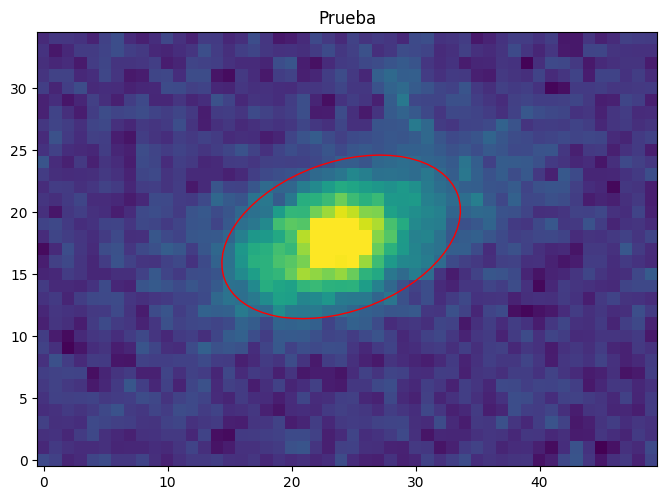

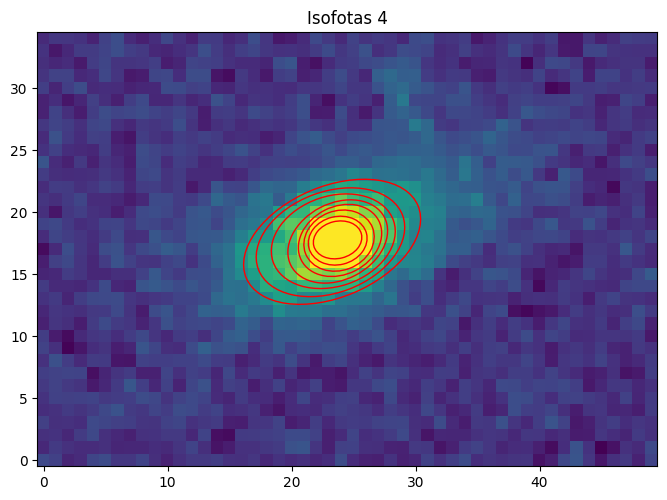

In [ ]:

geometry = EllipseGeometry(x0=24, y0=18, sma=10, eps=0.4,pa=20 * np.pi / 180.0)
apert = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,\
                           geometry.sma * (1 - geometry.eps),geometry.pa)

plt.figure(figsize=(8,8))
plt.imshow(ob4, origin='lower',vmax=np.mean(z_layer)+np.std(z_layer))
plt.title('Prueba')
apert.plot(color='red')

isofo4=isofogen(ob4,geometry)

plt.figure(figsize=(8,8))
plt.imshow(ob4, origin='lower',vmax=np.mean(z_layer)+np.std(z_layer))
plt.title('Isofotas 4')
for i in range (15,30,2):
    aper(isofo4,i).plot(color='red')


**Objeto 5**

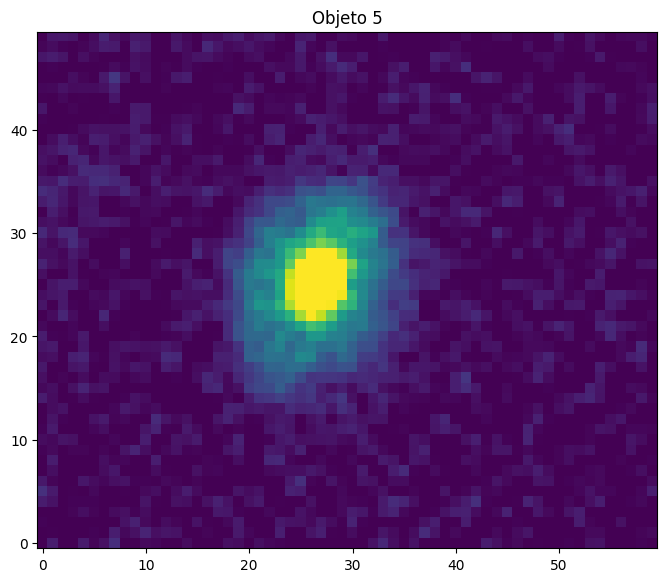

In [ ]:
#Objeto 5

ob5 = z_layer[80:130, 890:950]
plt.figure(figsize=(8,8))
plt.imshow(ob5, origin='lower',\
           vmin=0, vmax=np.mean(z_layer)+np.std(z_layer))
plt.title('Objeto 5')
plt.show()



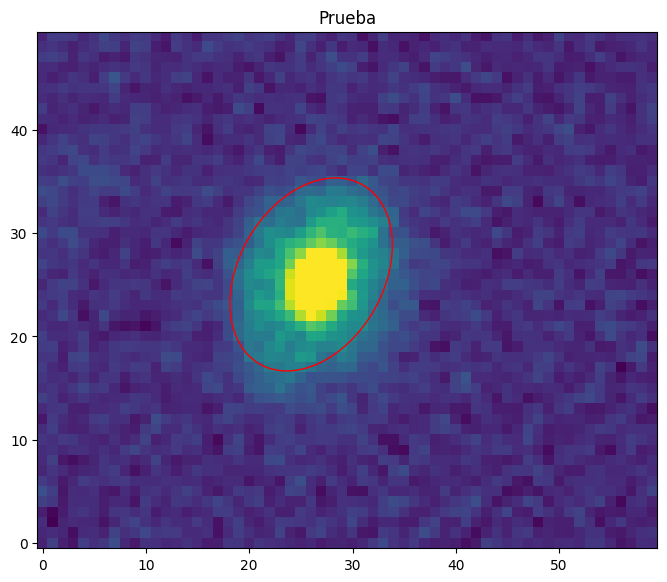

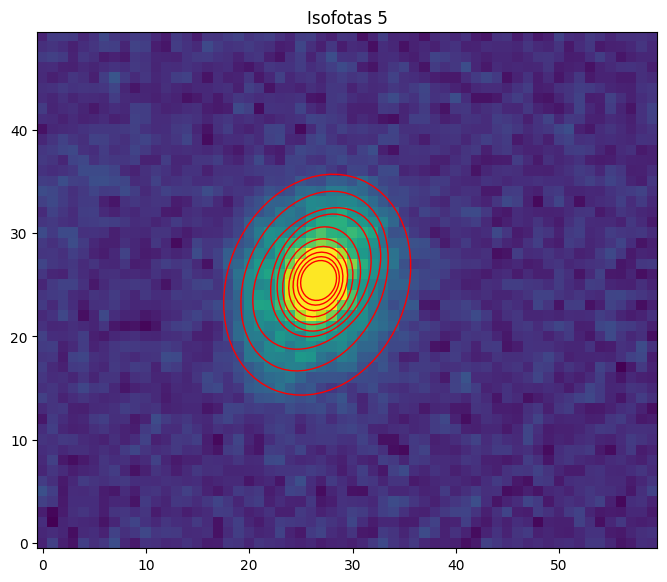

In [ ]:

geometry = EllipseGeometry(x0=26, y0=26, sma=10, eps=0.3,pa=60 * np.pi / 180.0)
apert = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,\
                           geometry.sma * (1 - geometry.eps),geometry.pa)

plt.figure(figsize=(8,8))
plt.imshow(ob5, origin='lower',vmax=np.mean(z_layer)+np.std(z_layer))
plt.title('Prueba')
apert.plot(color='red')

isofo5=isofogen(ob5,geometry)

plt.figure(figsize=(8,8))
plt.imshow(ob5, origin='lower',vmax=np.mean(z_layer)+np.std(z_layer))
plt.title('Isofotas 5')
for i in range (15,35,2):
    aper(isofo5,i).plot(color='red')



**Objeto 6**

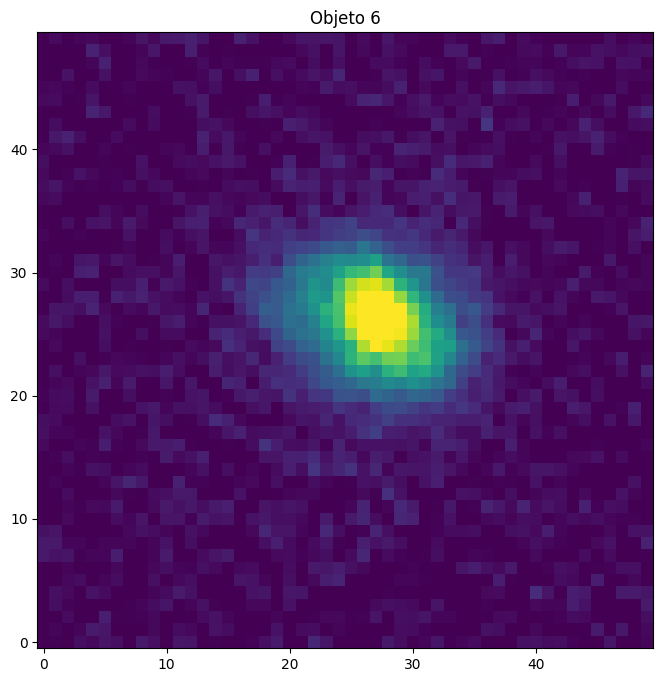

In [ ]:
ob6 = z_layer[450:500, 940:990]
plt.figure(figsize=(8,8))
plt.imshow(ob6, origin='lower',\
           vmin=0, vmax=np.mean(z_layer)+np.std(z_layer))
plt.title('Objeto 6')
plt.show()



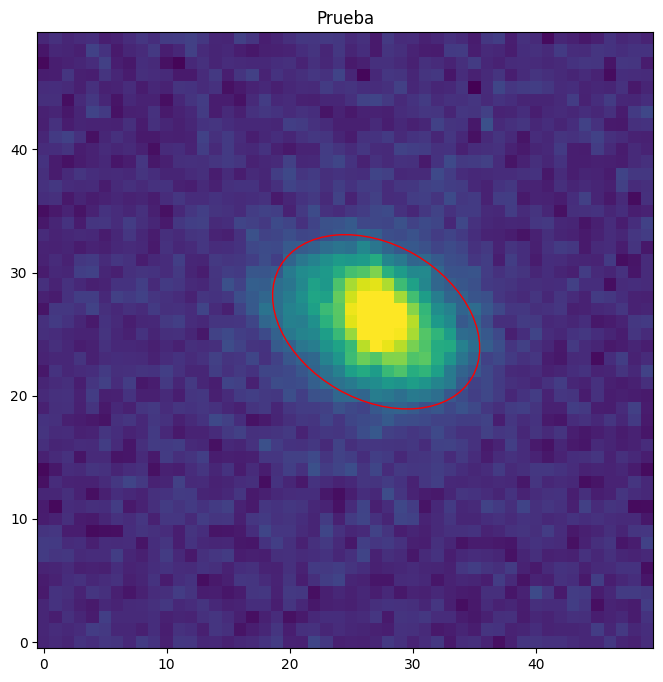

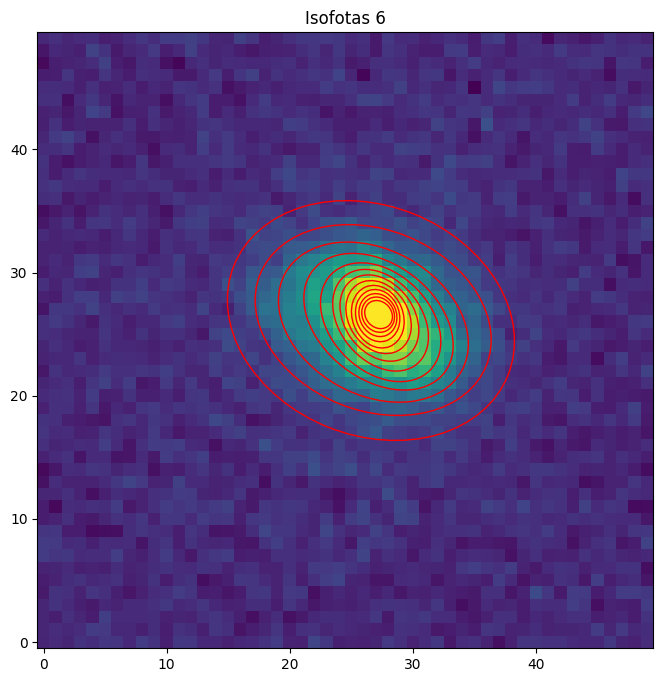

In [ ]:

geometry = EllipseGeometry(x0=27, y0=26, sma=9, eps=0.3,pa=150 * np.pi / 180.0)
apert = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,\
                           geometry.sma * (1 - geometry.eps),geometry.pa)

plt.figure(figsize=(8,8))
plt.imshow(ob6, origin='lower',vmax=np.mean(z_layer)+np.std(z_layer))
plt.title('Prueba')
apert.plot(color='red')

isofo6=isofogen(ob6,geometry)

plt.figure(figsize=(8,8))
plt.imshow(ob6, origin='lower',vmax=np.mean(z_layer)+np.std(z_layer))
plt.title('Isofotas 6')
for i in range (10,35,2):
    aper(isofo6,i).plot(color='red')


**Objeto 7**

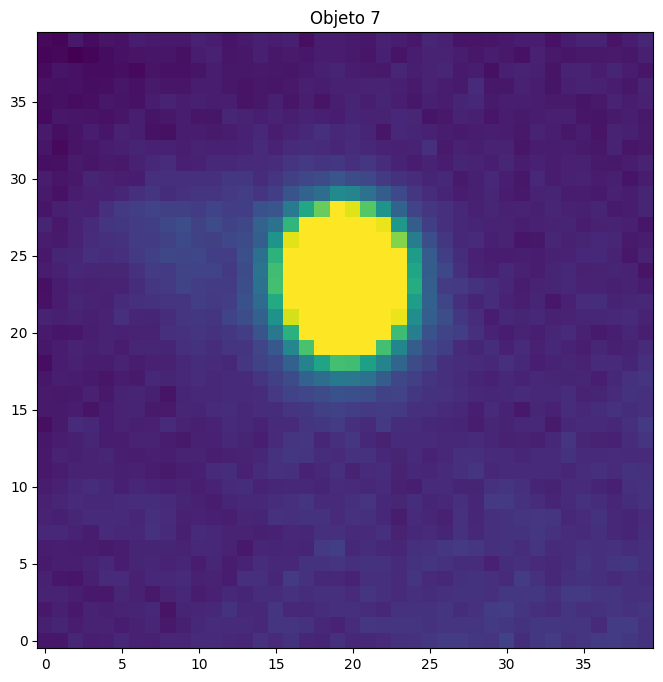

In [39]:

ob7 = g_layer[550:590, 380:420]
plt.figure(figsize=(8,8))
plt.imshow(ob7, origin='lower',\
           vmin=0, vmax=np.mean(g_layer)+np.std(g_layer))
plt.title('Objeto 7')
plt.show()

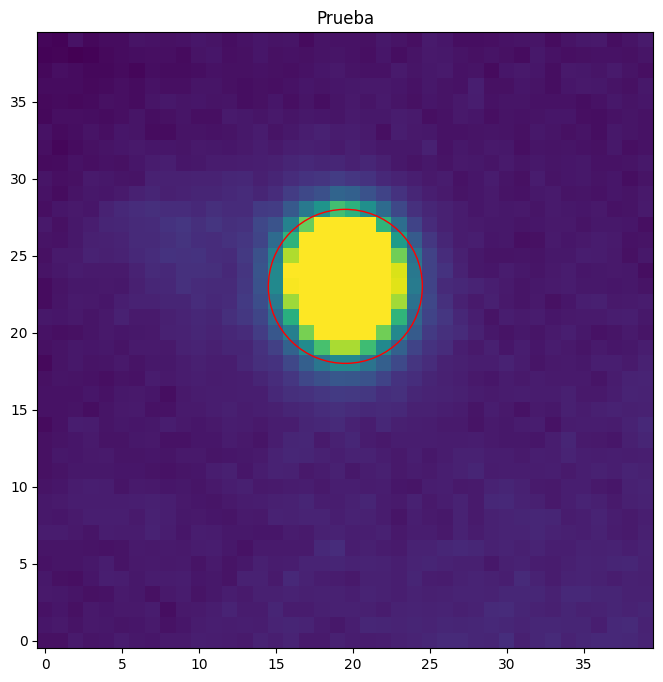

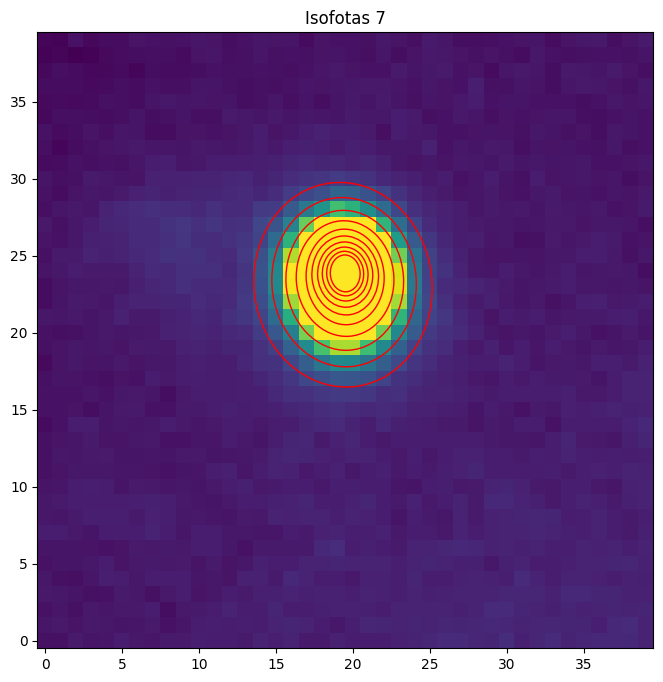

In [ ]:

geometry = EllipseGeometry(x0=19.5, y0=23, sma=5, eps=0,pa=1 * np.pi / 180.0)
apert = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,\
                           geometry.sma * (1 - geometry.eps),geometry.pa)

plt.figure(figsize=(8,8))
plt.imshow(ob7, origin='lower',vmax=np.mean(z_layer)+np.std(z_layer))
plt.title('Prueba')
apert.plot(color='red')

isofo7=isofogen(ob7,geometry)

plt.figure(figsize=(8,8))
plt.imshow(ob7, origin='lower',vmax=np.mean(z_layer)+np.std(z_layer))
plt.title('Isofotas 7')
for i in range (10,30,2):
    aper(isofo7,i).plot(color='red')

**Objeto 8**

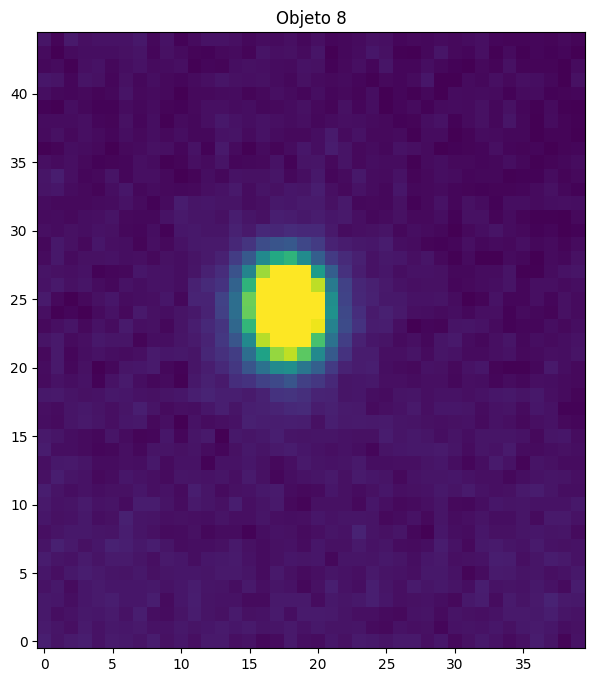

In [40]:


ob8 = g_layer[535:580, 600:640]
plt.figure(figsize=(8,8))
plt.imshow(ob8, origin='lower',\
           vmin=0, vmax=np.mean(g_layer)+np.std(g_layer))
plt.title('Objeto 8')
plt.show()

**Objeto 9**

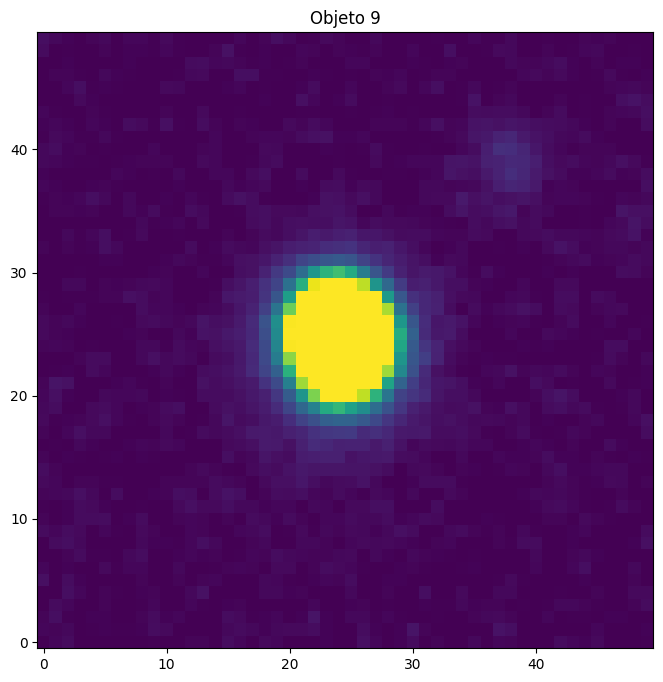

In [41]:

ob9 = g_layer[340:390, 830:880]
plt.figure(figsize=(8,8))
plt.imshow(ob9, origin='lower',\
           vmin=0, vmax=np.mean(g_layer)+np.std(g_layer))
plt.title('Objeto 9')
plt.show()





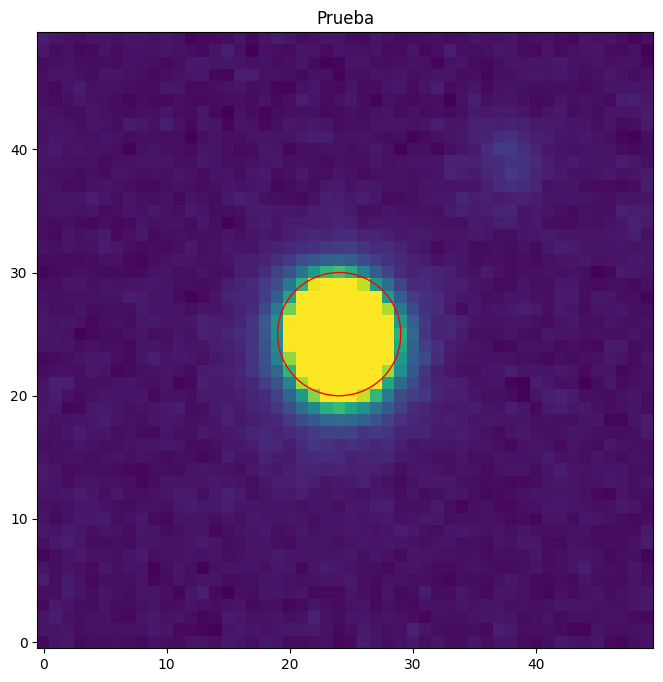

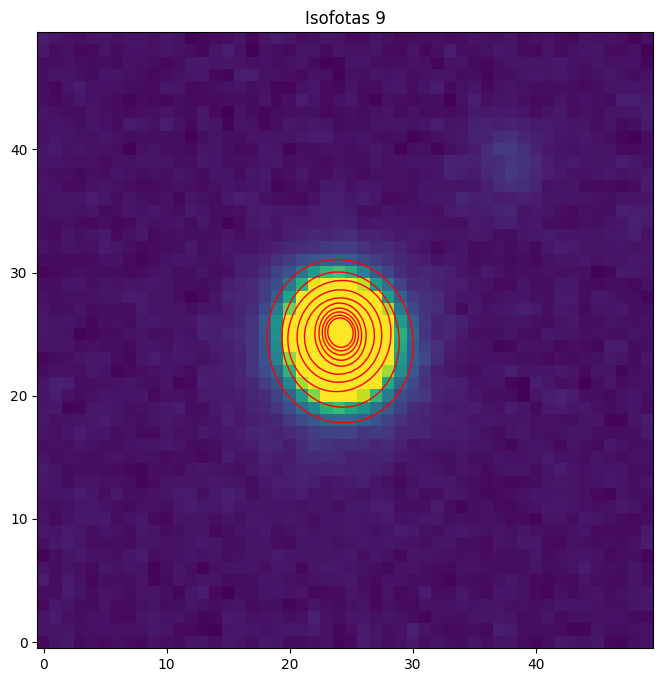

In [ ]:

geometry = EllipseGeometry(x0=24, y0=25, sma=5, eps=0,pa=1 * np.pi / 180.0)
apert = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,\
                           geometry.sma * (1 - geometry.eps),geometry.pa)

plt.figure(figsize=(8,8))
plt.imshow(ob9, origin='lower',vmax=np.mean(g_layer)+np.std(g_layer))
plt.title('Prueba')
apert.plot(color='red')

isofo9=isofogen(ob9,geometry)

plt.figure(figsize=(8,8))
plt.imshow(ob9, origin='lower',vmax=np.mean(g_layer)+np.std(g_layer))
plt.title('Isofotas 9')
for i in range (10,30,2):
    aper(isofo9,i).plot(color='red')